In [1]:
%matplotlib inline
import sys
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
#Importing libraries to implement and test performance of Ensemble models

import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [69]:
data=pd.read_csv("../Going In-depth/IMDb4.csv")
data.columns

Index(['castTotalLikes', 'directorLikes', 'movieLikes', 'fbPosters', 'year',
       'duration', 'genre', 'contentRating', 'criticReviews', 'userReviews',
       'userVotes', 'rating', 'categories'],
      dtype='object')

In [72]:
x=data.drop(['categories','rating'],axis=1)
y=data.categories
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [76]:
#Running Single Ensemble

clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test,pred))
print("\nAccuracy:%f"%sklearn.metrics.accuracy_score(y_test,pred))

[[ 79  88   0   0]
 [ 38 829  11   0]
 [  0  87  18   0]
 [  0  10   1   0]]

Accuracy:0.797588


In [82]:
#Implementing Extra Tree Classifiers to calculate variable importance
model=ExtraTreesClassifier()
model=model.fit(X_train,y_train)
print(model.feature_importances_.round(4))

[ 0.0721  0.0791  0.0888  0.0573  0.1117  0.0882  0.0786  0.056   0.0927
  0.1062  0.1692]


Max Accuracy:0.820844


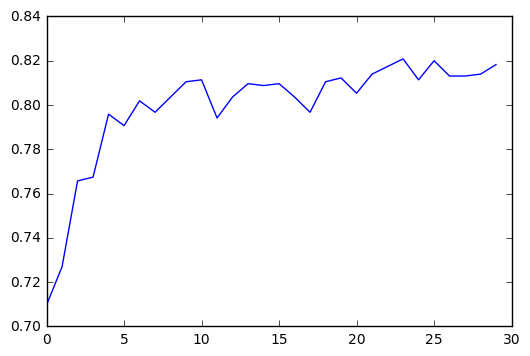

In [84]:
#Test impact on Accuracy by tuning Hyperparameters within RF
trees=range(30)
accuracy=np.zeros(30)

for idx in range(len(trees)):
    clf=RandomForestClassifier(n_estimators=idx+1,max_features=0.5)
    clf=clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(y_test,pred)
plt.cla
plt.plot(trees,accuracy)

print("Max Accuracy:%f"%accuracy.max())